In [17]:
# 📌 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re

# Better plots
sns.set(style="whitegrid")


In [3]:
# Load dataset from raw folder
df = pd.read_csv("E:\\sentimentanalysisproject\\chatgpt_style_reviews_dataset.csv")

print("Shape:", df.shape)
df.head()


Shape: (50, 12)


,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2024-12-24,East list local interesting far magazine father.,Impressive natural language understanding. Alm...,1,darren55,25,9,Google Play,de,Nepal,2.0.4,No
1,2024-07-26,Road determine picture figure hard experience ...,Sometimes gives wrong answers or outdated info...,2,davistyler,35,14,Flipkart,es,Panama,2.6.5,No
2,2024-08-22,Policy social past analysis whole.,Great tool for generating content quickly. Int...,5,andrea59,94,10,App Store,es,Denmark,4.2.2,No
3,2025-04-24,News financial billion four foreign.,Great tool for generating content quickly. Sta...,3,dcooper,50,15,Amazon,de,Brunei Darussalam,4.4.2,No
4,2024-08-15,To skill she case sing stop likely.,Excellent for language translation and grammar...,1,christine79,33,11,Flipkart,fr,United States Minor Outlying Islands,5.1.1,Yes


In [6]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Drop rows with missing reviews
df = df.dropna(subset=["review"])

# Fill missing values in other columns
df.fillna({"location": "Unknown", "version": "Unknown", "platform": "Unknown"}, inplace=True)

print("After cleaning:", df.shape)
df.isna().sum()


After cleaning: (50, 12)


date                 0
title                0
review               0
rating               0
username             0
helpful_votes        0
review_length        0
platform             0
language             0
location             0
version              0
verified_purchase    0
dtype: int64

In [5]:
# Map ratings to sentiment
def map_sentiment(rating):
    if rating <= 2:
        return "Negative"
    elif rating == 3:
        return "Neutral"
    else:
        return "Positive"

df["sentiment"] = df["rating"].apply(map_sentiment)

# Add review length feature
df["review_length"] = df["review"].astype(str).apply(len)

df[["rating", "review", "sentiment", "review_length"]].head()


,rating,review,sentiment,review_length
0,1,Impressive natural language understanding. Alm...,Negative,76
1,2,Sometimes gives wrong answers or outdated info...,Negative,99
2,5,Great tool for generating content quickly. Int...,Positive,80
3,3,Great tool for generating content quickly. Sta...,Neutral,97
4,1,Excellent for language translation and grammar...,Negative,83


In [6]:
#Import NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Download resources if running first time
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")


[nltk_data] Downloading package stopwords to
[nltk_data]     e:\sentimentanalysisproject\.venv\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     e:\sentimentanalysisproject\.venv\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     e:\sentimentanalysisproject\.venv\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [7]:
#Define preprocessing function
# Initialize
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    
    # Remove numbers and punctuation
    text = re.sub(r"[^a-z\s]", "", text)
    
    # Tokenize
    words = text.split()
    
    # Remove stopwords & lemmatize
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    
    return " ".join(words)


In [8]:
df["clean_review"] = df["review"].astype(str).apply(preprocess_text)

df[["review", "clean_review"]].head(10)


,review,clean_review
0,Impressive natural language understanding. Alm...,impressive natural language understanding almo...
1,Sometimes gives wrong answers or outdated info...,sometimes give wrong answer outdated info stud...
2,Great tool for generating content quickly. Int...,great tool generating content quickly interest...
3,Great tool for generating content quickly. Sta...,great tool generating content quickly start me...
4,Excellent for language translation and grammar...,excellent language translation grammar fix pri...
5,Explains complex topics clearly and simply. De...,explains complex topic clearly simply detail v...
6,Excellent for language translation and grammar...,excellent language translation grammar fix fun...
7,Sometimes gives wrong answers or outdated info...,sometimes give wrong answer outdated info catc...
8,Sometimes gives wrong answers or outdated info...,sometimes give wrong answer outdated info else...
9,Very helpful for coding and debugging tasks. S...,helpful coding debugging task tax much hard th...


In [9]:
# Save cleaned dataset
df.to_csv("cleaned_reviews.csv", index=False)
print("✅ Clean dataset saved ")


✅ Clean dataset saved 


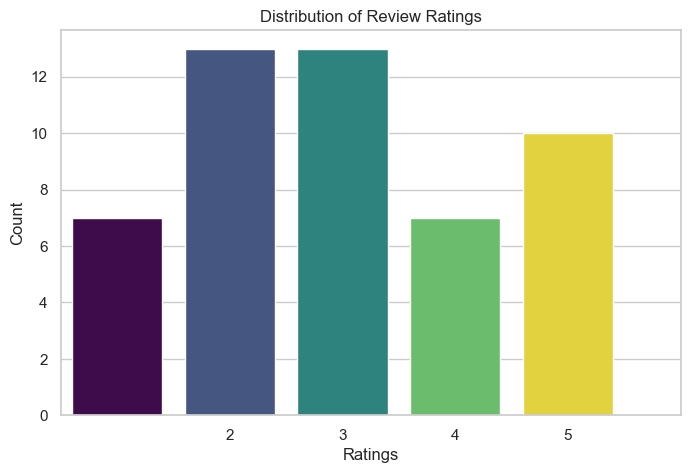

In [15]:
#1.Rating distribution
# Count the occurrences of each rating
rating_counts = df["rating"].value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(8,5))
sns.barplot(
    x=rating_counts.index,
    y=rating_counts.values,
    hue=rating_counts.index,   # Assign hue
    palette="viridis",
    legend=False               # Hide redundant legend
)
plt.title("Distribution of Review Ratings")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.xticks(rating_counts.index)  # Ensure correct x-axis labels
plt.show()


Number of reviews with helpful_votes > 50: 32
Percentage of total reviews: 64.00%


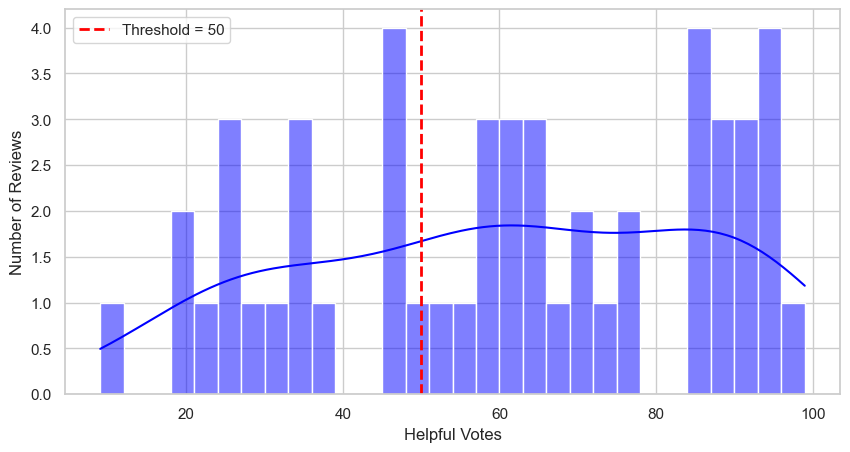

In [16]:
# 2.📊 Distribution of Helpful Votes with Threshold Line

# Define threshold
threshold = 50

# Filter reviews above threshold
helpful_reviews = df[df["helpful_votes"] > threshold]

# Count and percentage
count_helpful = helpful_reviews.shape[0]
percent_helpful = (count_helpful / df.shape[0]) * 100

print(f"Number of reviews with helpful_votes > {threshold}: {count_helpful}")
print(f"Percentage of total reviews: {percent_helpful:.2f}%")

# Plot distribution with threshold line
plt.figure(figsize=(10,5))
sns.histplot(df['helpful_votes'], bins=30, kde=True, color='blue')
plt.axvline(threshold, color='red', linestyle='dashed', linewidth=2, 
            label=f'Threshold = {threshold}')
# plt.title("Distribution of Helpful Votes")  # ❌ removed title
plt.xlabel("Helpful Votes")
plt.ylabel("Number of Reviews")
plt.legend()
plt.show()


🔹 Top 20 Positive Keywords:
great: 4
tool: 4
generating: 4
content: 4
quickly: 4
clearly: 4
explains: 3
complex: 3
topic: 3
simply: 3
good: 3
summarizing: 3
large: 3
document: 3
natural: 2
sometimes: 2
need: 2
improvement: 2
handling: 2
technical: 2

🔹 Top 20 Negative Keywords:
language: 6
sometimes: 5
good: 4
impressive: 3
natural: 3
understanding: 3
give: 3
wrong: 3
answer: 3
outdated: 3
info: 3
excellent: 3
translation: 3
grammar: 3
fix: 3
thousand: 3
summarizing: 3
large: 3
document: 3
student: 2


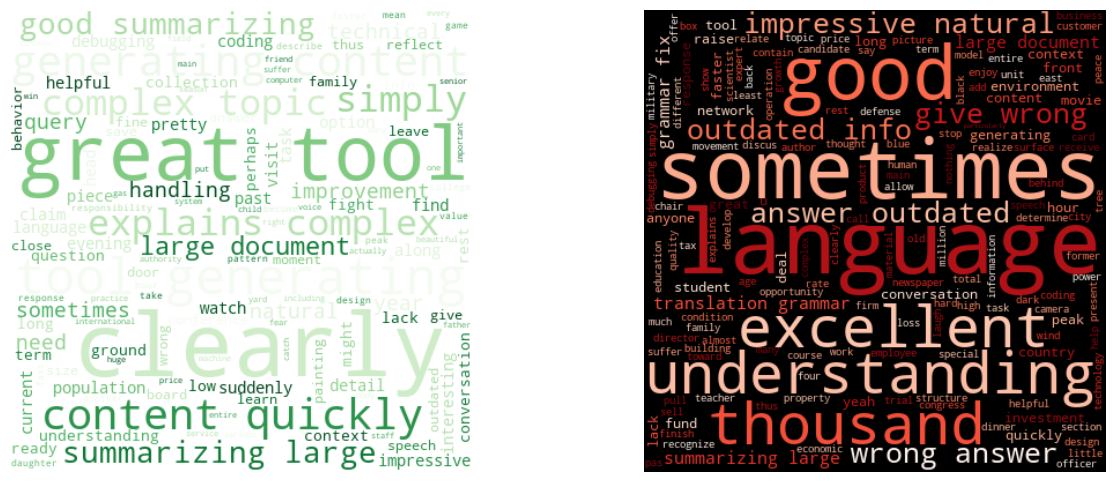

In [41]:
import ast

# 3 📊 Most Common Keywords in Positive vs. Negative Reviews

def safe_convert(x):
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)   # Try parsing as dictionary
        except:
            return {"lemmatized_words": x.split()}  # Fallback: treat as text
    return x

df["clean_review"] = df["clean_review"].apply(safe_convert)

# Extract lemmatized words
df["lemmatized_text"] = df["clean_review"].apply(lambda x: " ".join(x["lemmatized_words"]))

# Separate positive and negative reviews
positive_words = " ".join(df[df["rating"] >= 4]["lemmatized_text"]).split()
negative_words = " ".join(df[df["rating"] <= 2]["lemmatized_text"]).split()

# Get most common words
pos_common = Counter(positive_words).most_common(20)
neg_common = Counter(negative_words).most_common(20)

print("🔹 Top 20 Positive Keywords:")
for word, freq in pos_common:
    print(f"{word}: {freq}")

print("\n🔹 Top 20 Negative Keywords:")
for word, freq in neg_common:
    print(f"{word}: {freq}")

# Generate word clouds
fig, ax = plt.subplots(1,2,figsize=(15,6))

wordcloud_pos = WordCloud(width=400, height=400, background_color="white",
                          colormap="Greens").generate(" ".join(positive_words))
wordcloud_neg = WordCloud(width=400, height=400, background_color="black",
                          colormap="Reds").generate(" ".join(negative_words))

ax[0].imshow(wordcloud_pos, interpolation='bilinear')
ax[0].axis("off")

ax[1].imshow(wordcloud_neg, interpolation='bilinear')
ax[1].axis("off")

plt.show()



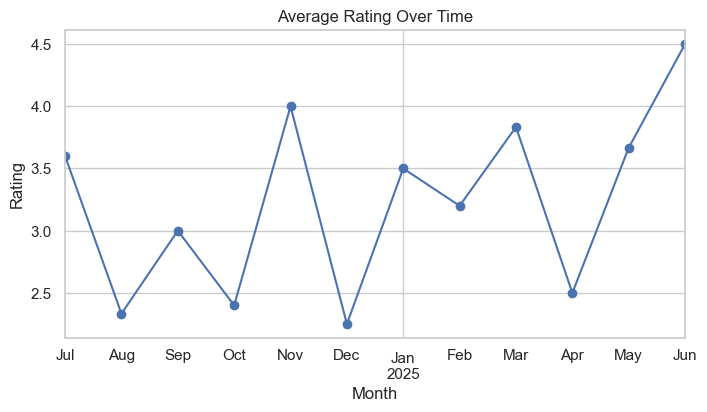

In [42]:
#4 Average rating over time
df["date"] = pd.to_datetime(df["date"], errors="coerce")

trend = df.groupby(df["date"].dt.to_period("M"))["rating"].mean()

plt.figure(figsize=(8,4))
trend.plot(marker="o")
plt.title("Average Rating Over Time")
plt.ylabel("Rating")
plt.xlabel("Month")
plt.show()


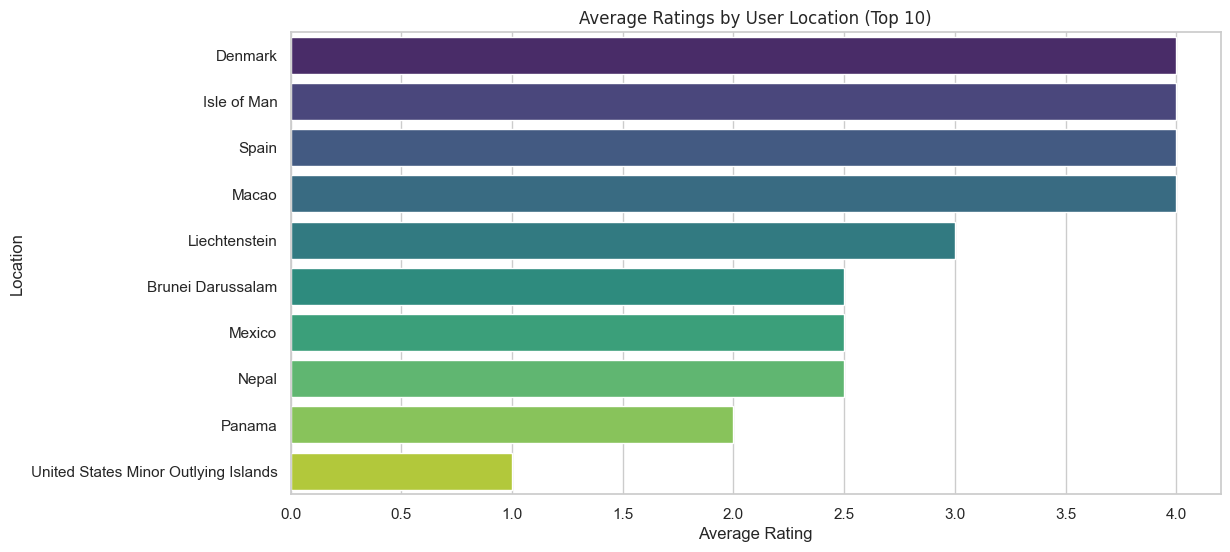

In [44]:
#5 🌍 Ratings by User Location (Top 10 most reviewed locations)

location_ratings = df.groupby("location")["rating"].mean().reset_index()
top_locs = df["location"].value_counts().nlargest(10).index
location_ratings = location_ratings[location_ratings["location"].isin(top_locs)]

plt.figure(figsize=(12,6))
sns.barplot(
    x="rating",
    y="location",
    data=location_ratings.sort_values("rating", ascending=False),
    hue="location",
    palette="viridis",
    legend=False
)
plt.xlabel("Average Rating")
plt.ylabel("Location")
plt.title("Average Ratings by User Location (Top 10)", fontname="DejaVu Sans")
plt.show()



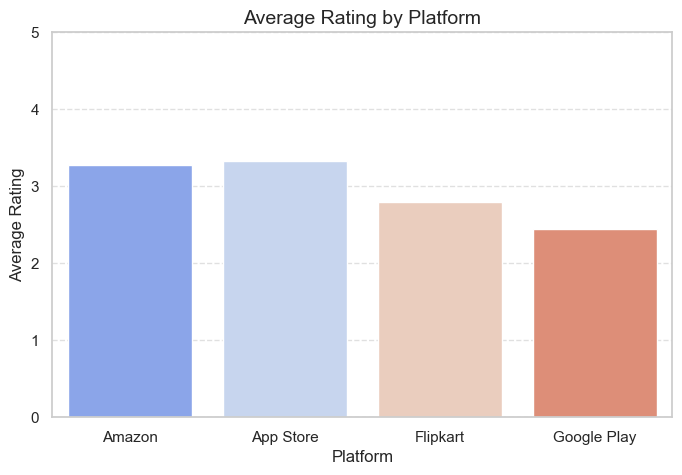

In [46]:
#6. Which platform (Web vs Mobile) gets better reviews?

# 📊 Average Rating by Platform

# Grouping and calculating average rating by platform
platform_avg_rating = df.groupby('platform')['rating'].mean().reset_index()

# Plotting
plt.figure(figsize=(8,5))
sns.barplot(
    x="platform", 
    y="rating", 
    data=platform_avg_rating,
    hue="platform",         # fixes FutureWarning
    palette="coolwarm",
    legend=False
)

plt.title("Average Rating by Platform", fontsize=14)
plt.xlabel("Platform", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.ylim(0, 5)  # Assuming rating scale is 0-5
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Display the plot
plt.show()


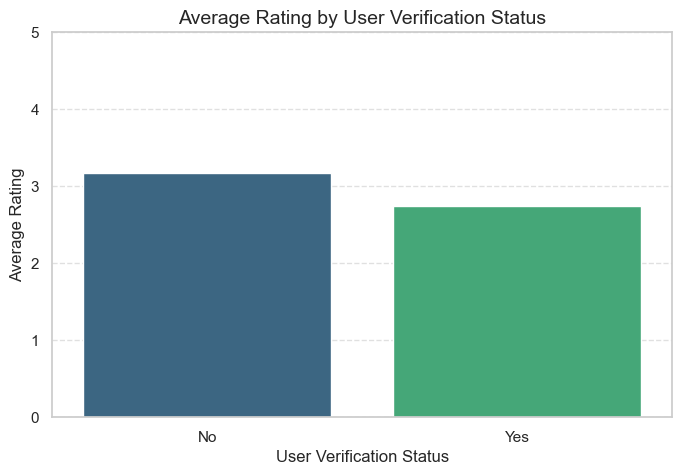

In [48]:
# 📊 7. Are verified users more satisfied than non-verified ones?

# Grouping data by verification status and calculating average rating
verified_avg_rating = df.groupby('verified_purchase')['rating'].mean().reset_index()

# Plotting
plt.figure(figsize=(8,5))
sns.barplot(
    x="verified_purchase", 
    y="rating", 
    data=verified_avg_rating,
    hue="verified_purchase",   # required for future seaborn
    palette="viridis",
    legend=False
)

# Titles and labels
plt.title("Average Rating by User Verification Status", fontsize=14)
plt.xlabel("User Verification Status", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.ylim(0, 5)  # Assuming rating scale is 0-5
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show plot
plt.show()


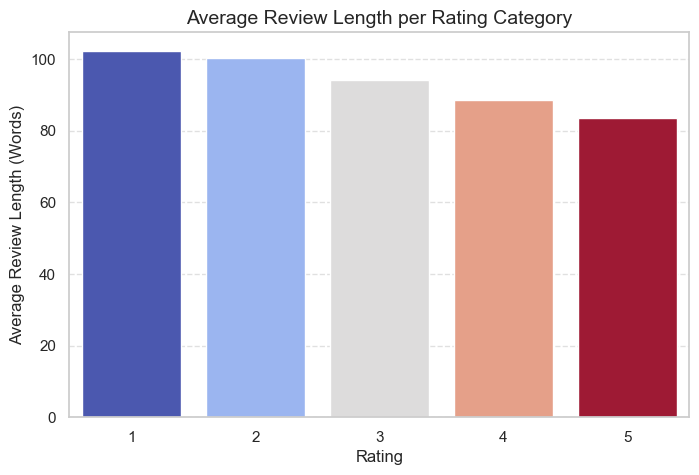

In [49]:
# 📏 8. What’s the average length of reviews per rating category?

# Grouping and calculating average review length by rating
average_review_length = df.groupby("rating")["review_length"].mean().reset_index()

# Plotting
plt.figure(figsize=(8,5))
sns.barplot(
    x="rating",
    y="review_length",
    data=average_review_length,
    hue="rating",           # required to use palette in Seaborn >= 0.14
    palette="coolwarm",
    legend=False
)

# Titles and labels
plt.title("Average Review Length per Rating Category", fontsize=14)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Average Review Length (Words)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Show plot
plt.show()


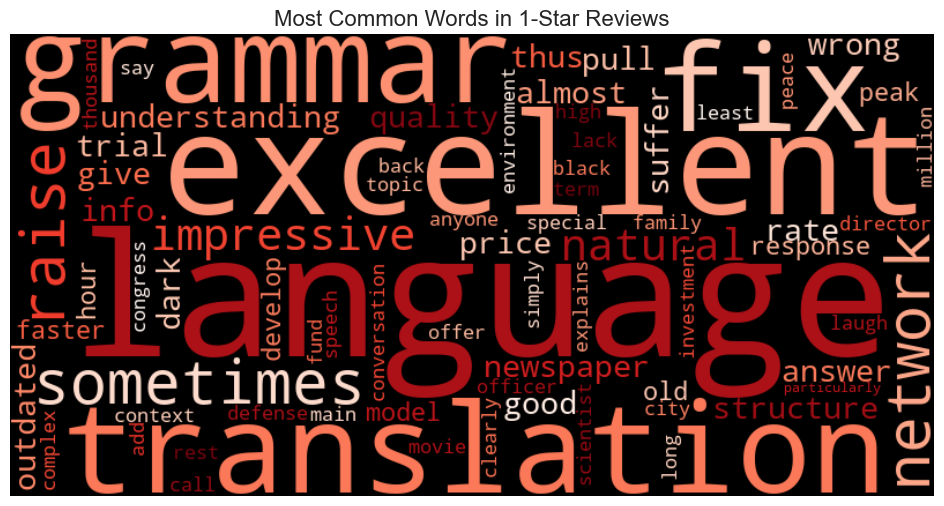

In [53]:
import ast
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 9️⃣ The most mentioned words in 1-star reviews

# Safely convert text column (if stored as string dicts)
df["clean_review"] = df["clean_review"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Extract lemmatized text
df["lemmatized_text"] = df["clean_review"].apply(lambda x: " ".join(x.get("lemmatized_words", [])))

# Filter only 1-star reviews
one_star_reviews = df[df["rating"] == 1]

if not one_star_reviews.empty:
    negative_text = " ".join(one_star_reviews["lemmatized_text"])
    
    # Generate word cloud
    plt.figure(figsize=(15,6))
    wordcloud_neg = WordCloud(
        width=800, 
        height=400, 
        background_color="black", 
        colormap="Reds"
    ).generate(negative_text)

    plt.imshow(wordcloud_neg, interpolation="bilinear")
    plt.title("Most Common Words in 1-Star Reviews", fontsize=16)
    plt.axis("off")
    plt.show()
else:
    print("⚠️ No 1-star reviews found in the dataset.")


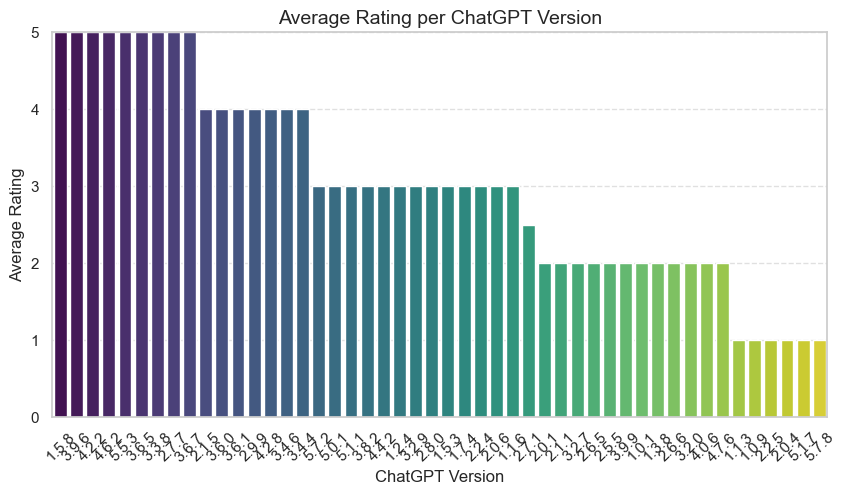

In [55]:
#10 Group by version and calculate average rating
average_rating_per_version = df.groupby("version")["rating"].mean().sort_values(ascending=False)

# Plot without FutureWarning
plt.figure(figsize=(10, 5))
sns.barplot(
    data=average_rating_per_version.reset_index(),
    x="version",
    y="rating",
    palette="viridis",
    hue="version",      # ✅ add hue to match x
    legend=False        # ✅ no duplicate legend
)

# Titles and labels
plt.title("Average Rating per ChatGPT Version", fontsize=14)
plt.xlabel("ChatGPT Version", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 5)  # Assuming rating scale is 0–5
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Show plot
plt.show()


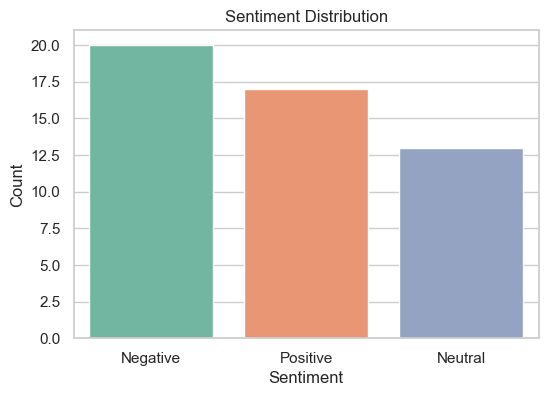

In [26]:
# Sentiment Distribution
plt.figure(figsize=(6,4))
sns.countplot(x="sentiment", hue="sentiment", data=df, palette="Set2", legend=False)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


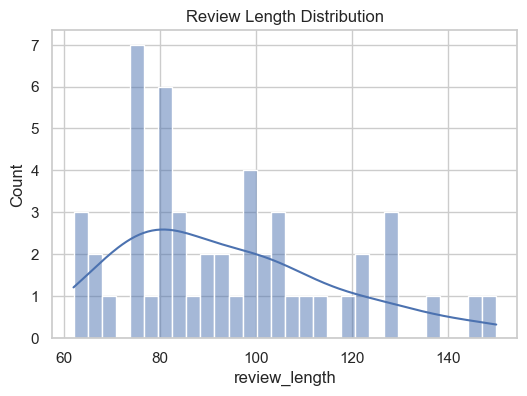

In [27]:
#Review Length Distribution
plt.figure(figsize=(6,4))
sns.histplot(df["review_length"], bins=30, kde=True)
plt.title("Review Length Distribution")
plt.show()


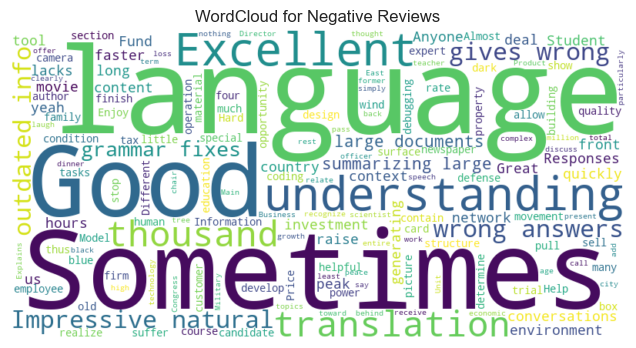

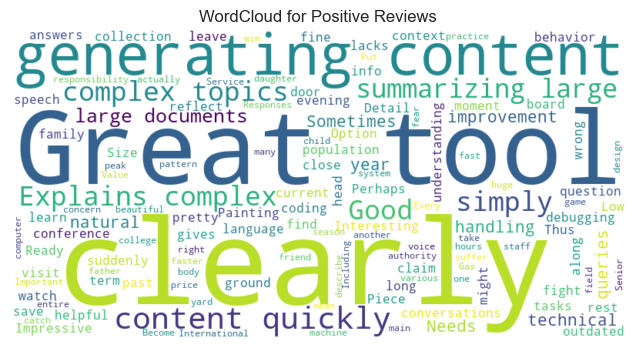

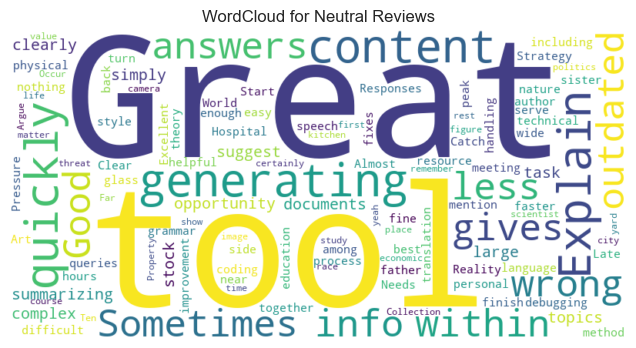

In [28]:
#Word clouds for each sentiment
for sentiment in df["sentiment"].unique():
    text = " ".join(df[df["sentiment"] == sentiment]["review"].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(8,4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"WordCloud for {sentiment} Reviews")
    plt.show()


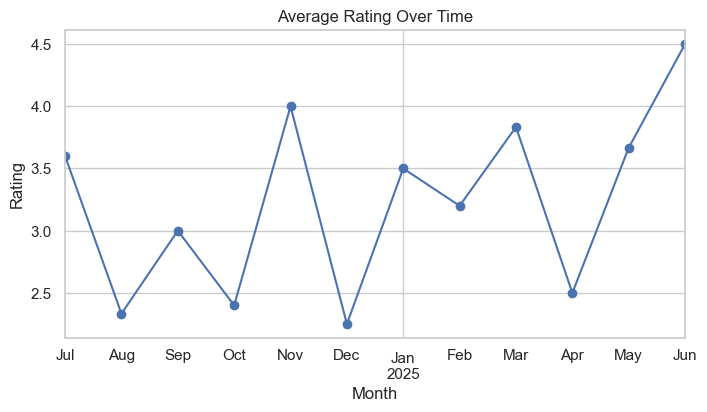

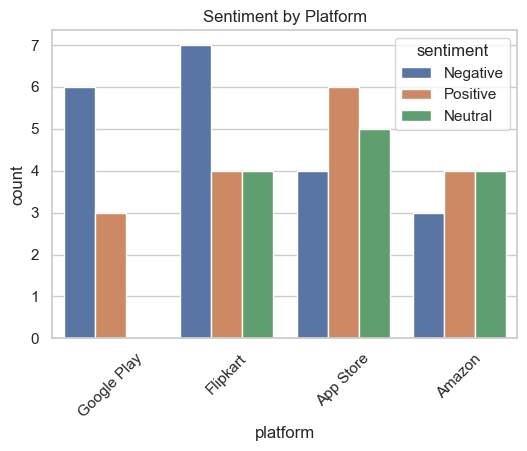

In [31]:
#Sentiment by platform
plt.figure(figsize=(6,4))
sns.countplot(x="platform", hue="sentiment", data=df)
plt.title("Sentiment by Platform")
plt.xticks(rotation=45)
plt.show()


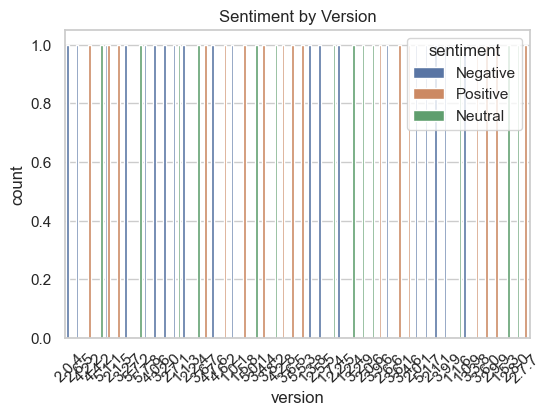

In [32]:
#Sentiment by version
plt.figure(figsize=(6,4))
sns.countplot(x="version", hue="sentiment", data=df)
plt.title("Sentiment by Version")
plt.xticks(rotation=45)
plt.show()


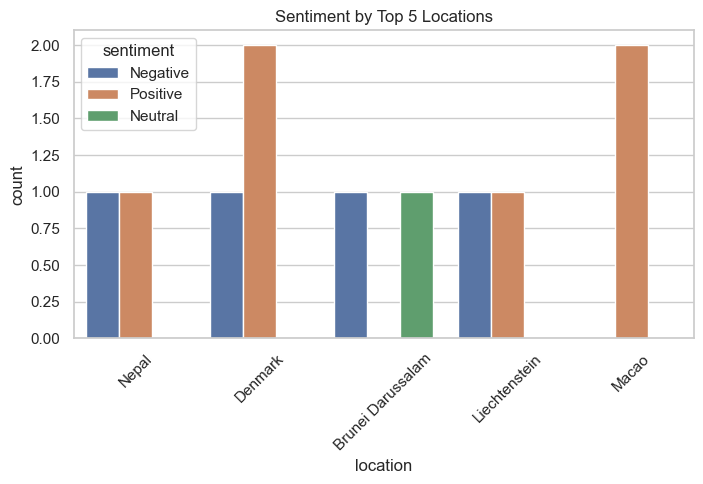

In [33]:
#Sentiment by location (Top 5)
top_locs = df["location"].value_counts().nlargest(5).index

plt.figure(figsize=(8,4))
sns.countplot(x="location", hue="sentiment", data=df[df["location"].isin(top_locs)])
plt.title("Sentiment by Top 5 Locations")
plt.xticks(rotation=45)
plt.show()


In [12]:
df.to_pickle("Cleaned_reviews.pkl")
print("Processed dataset saved as 'processed_reviews.pkl'")

Processed dataset saved as 'processed_reviews.pkl'
